In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

### Step 0: Load Preprocessed Binary Encoded Dataset

In [2]:
# Replace with the actual path to your CSV
df = pd.read_csv(r"data/processed_data.csv")

# Ensure all values are boolean / binary
df = df.astype(bool)

print("Dataset shape:", df.shape)
print("Sample transactions:")
df.head()

Dataset shape: (500, 71)
Sample transactions:


,Age_Teen,Age_Young_Adult,Age_Adult,Age_Mid_Adult,Location_India,Location_US,Location_Other,Gender_Female,Gender_Male,Gender_Other,...,Spend_100-500,Spend_500-1000,Spend_1000plus,Spend_Unknown,Reason_Fun,Reason_Stress_Relief,Reason_Skills_Competition,Reason_Socialize,Reason_Learning,Reason_Other
0,True,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False
1,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,False,True,False,False,True,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
3,True,False,False,False,False,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,True,False,False,False,True,False,False,True,False,False,...,False,False,False,False,True,True,True,True,False,False


### Step 1: Generate Frequent Itemsets

In [11]:
MIN_SUPPORT = 0.25  # adjust based on dataset size (500+ entries recommended)

frequent_itemsets = apriori(
    df,
    min_support=MIN_SUPPORT,
    use_colnames=True
)

frequent_itemsets.sort_values(by="support", ascending=False, inplace=True)

print("\nFrequent Itemsets:")
print(frequent_itemsets)


Frequent Itemsets:
    support                                        itemsets
26    0.668                                    (Reason_Fun)
13    0.596                        (Genre_Action/Adventure)
11    0.588                                 (Device_Mobile)
4     0.536                                 (Gender_Female)
2     0.530                                (Location_India)
..      ...                                             ...
25    0.252                                 (Spend_100-500)
53    0.252           (Gaming_Hours_5-10_hours, Reason_Fun)
59    0.250        (Device_Mobile, Discovery_Gaming_Forums)
80    0.250  (Discovery_Social_Media, Reason_Stress_Relief)
85    0.250                       (Spend_lt100, Reason_Fun)

[88 rows x 2 columns]


### Step 2: Generate Association Rules

In [ ]:
MIN_CONFIDENCE = 0.5

rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=MIN_CONFIDENCE
)

# Optional: filter for meaningful rules
rules = rules[
    (rules["lift"] > 1) &
    (rules["confidence"] >= MIN_CONFIDENCE)
]

print("\nAssociation Rules:")
print(
    rules[
        ["antecedents", "consequents", "support", "confidence", "lift"]
    ].head(15)
)



Association Rules:
                 antecedents               consequents  support  confidence  \
0            (Device_Mobile)              (Reason_Fun)    0.400    0.680272   
1               (Reason_Fun)           (Device_Mobile)    0.400    0.598802   
2   (Genre_Action/Adventure)              (Reason_Fun)    0.398    0.667785   
3               (Reason_Fun)  (Genre_Action/Adventure)    0.398    0.595808   
4           (Game_Mode_Both)              (Reason_Fun)    0.380    0.722433   
5               (Reason_Fun)          (Game_Mode_Both)    0.380    0.568862   
6            (Gender_Female)              (Reason_Fun)    0.358    0.667910   
7               (Reason_Fun)           (Gender_Female)    0.358    0.535928   
8            (Device_Mobile)  (Genre_Action/Adventure)    0.356    0.605442   
9   (Genre_Action/Adventure)           (Device_Mobile)    0.356    0.597315   
10          (Location_India)              (Reason_Fun)    0.350    0.660377   
11              (Reason_Fun)    

### Step 3: Visualize Association Rules

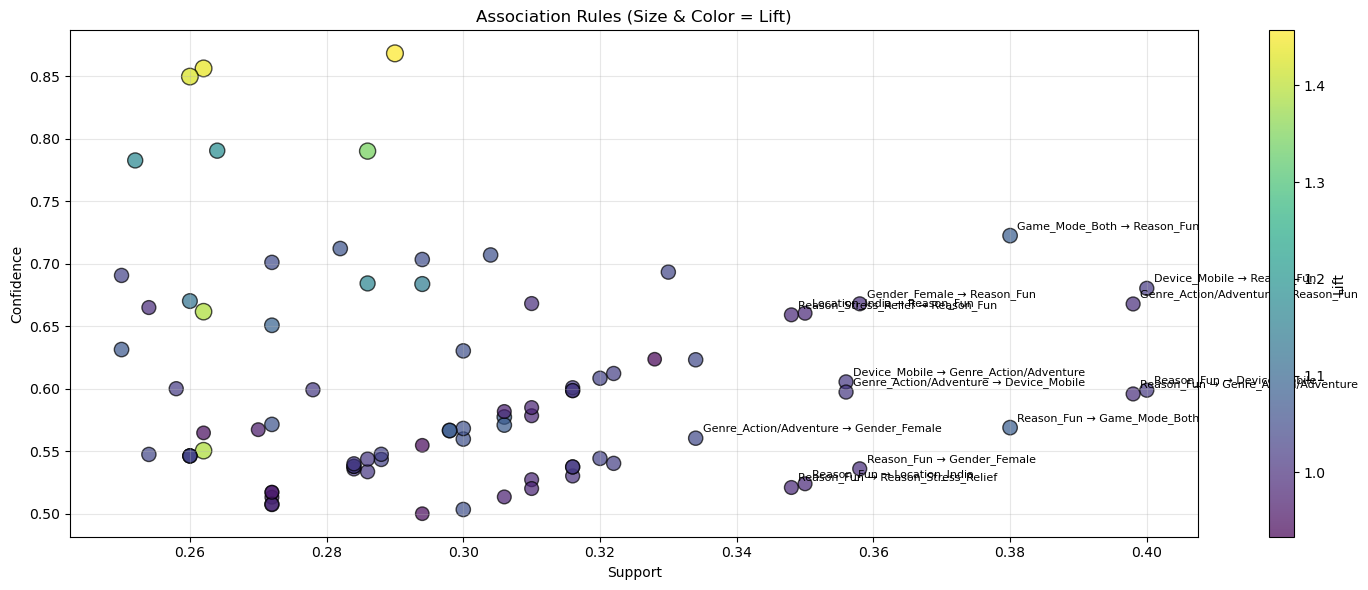

In [23]:
if len(rules) > 0:
    plt.figure(figsize=(15, 6))

    scatter = plt.scatter(
        rules["support"],
        rules["confidence"],
        s=rules["lift"] * 100,
        c=rules["lift"],
        cmap="viridis",
        edgecolors="k",
        alpha=0.7
    )

    # Annotate rules (limit to avoid clutter)
    for _, row in rules.head(15).iterrows():
        antecedents = ", ".join(row["antecedents"])
        consequents = ", ".join(row["consequents"])
        plt.annotate(
            f"{antecedents} → {consequents}",
            (row["support"], row["confidence"]),
            textcoords="offset points",
            xytext=(5, 5),
            fontsize=8
        )

    plt.xlabel("Support")
    plt.ylabel("Confidence")
    plt.title("Association Rules (Size & Color = Lift)")
    plt.colorbar(scatter, label="Lift")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No association rules found with the given thresholds.")